<a href="https://colab.research.google.com/github/RafsanJany-44/ARC/blob/master/1_09_Building_Neural_Network_from_scratch.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Building Neural Network from Scratch

Putting all the concepts we have learned so far, we will see how to build a neural network
from scratch. We will learn how the neural network learns to perform the XOR gate
operation. The XOR gate returns 1 only when exactly only one of its inputs is 1 else it returns 0 as shown in
the following figure:

![image](https://github.com/PacktPublishing/Hands-On-Deep-Learning-Algorithms-with-Python/blob/master/Chapter01/images/1.png?raw=1)


To perform the XOR gate operation, we build a simple two-layer neural network as shown
in the following figure. As you can observe, we have an input layer with two nodes, a
hidden layer with five nodes and an output layers which consist of 1 node:


![image](https://github.com/PacktPublishing/Hands-On-Deep-Learning-Algorithms-with-Python/blob/master/Chapter01/images/2.png?raw=1)


First, import the libraries:

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

Prepare the data as shown in the above XOR table:

In [39]:
#x = np.array([ [0], [1], [1],[0]])


x = np.array([ [0,1], [1,0], [1,1],[0,0]])
y = np.array([ [1], [1], [0], [0]])

Define the number of nodes in each layer:

In [40]:
num_input = x.shape[1]
num_hidden = 5
num_output = 1

Initialize weights and bias randomly. First, we initialize, input to hidden layer weights:

In [41]:
Wxh = np.random.randn(num_input,num_hidden)
bh = np.zeros((1,num_hidden))

In [42]:
Wxh

array([[ 0.58190922,  0.77320038, -1.01427372,  1.29463201,  1.26059529],
       [ 0.96372064,  0.39480067, -0.45342645,  1.28085465, -0.05834511]])

In [43]:
bh

array([[0., 0., 0., 0., 0.]])

Now initialize, hidden to output layer weights:

In [44]:
Why = np.random.randn (num_hidden,num_output)
by = np.zeros((1,num_output))

In [45]:
Why

array([[ 0.99096322],
       [-1.23367612],
       [-0.63725525],
       [ 0.57728684],
       [-0.08056375]])

In [46]:
by

array([[0.]])

Define the sigmoid activation function:

In [47]:
def sigmoid(z):
    return 1 / (1+np.exp(-z))

Define the derivative of the sigmoid function:

In [48]:
def sigmoid_derivative(z):
    return np.exp(-z)/((1+np.exp(-z))**2)

Define the forward propagation:

In [49]:
def forward_prop(x,Wxh,Why):
    z1 = np.dot(x,Wxh) + bh
    a1 = sigmoid(z1)
    z2 = np.dot(a1,Why) + by
    y_hat = sigmoid(z2)

    return z1,a1,z2,y_hat

Define the backward propagation:

In [50]:
def backword_prop(y_hat, z1, a1, z2):
    delta2 = np.multiply(-(y-y_hat),sigmoid_derivative(z2))
    dJ_dWhy = np.dot(a1.T, delta2)
    delta1 = np.dot(delta2,Why.T)*sigmoid_derivative(z1)
    dJ_dWxh = np.dot(x.T, delta1)

    return dJ_dWxh, dJ_dWhy

Define the cost function:

In [51]:
def cost_function(y, y_hat):
    J = 0.5*sum((y-y_hat)**2)
    return J

Set the learning rate and number of training iterations:

In [52]:
alpha = 0.01
num_iterations = 1

#Detail Calculation


In [53]:
x

array([[0, 1],
       [1, 0],
       [1, 1],
       [0, 0]])

In [54]:
Wxh

array([[ 0.58190922,  0.77320038, -1.01427372,  1.29463201,  1.26059529],
       [ 0.96372064,  0.39480067, -0.45342645,  1.28085465, -0.05834511]])

In [55]:
z1 = np.dot(x,Wxh) + bh

In [56]:
z1

array([[ 0.96372064,  0.39480067, -0.45342645,  1.28085465, -0.05834511],
       [ 0.58190922,  0.77320038, -1.01427372,  1.29463201,  1.26059529],
       [ 1.54562986,  1.16800106, -1.46770016,  2.57548666,  1.20225018],
       [ 0.        ,  0.        ,  0.        ,  0.        ,  0.        ]])

**Explaination of Z1**

  <h2>Detailed Breakdown of Dot Product</h2>

  <table>
    <tr>
      <th>Element</th>
      <th>Calculation</th>
      <th>Result</th>
    </tr>
    <!-- Row 1 -->
    <tr>
      <td>Result[1,1]</td>
      <td>(0 × 0.31863045) + (1 × -1.69249236)</td>
      <td>-1.69249236</td>
    </tr>
    <tr>
      <td>Result[1,2]</td>
      <td>(0 × 0.31685954) + (1 × -0.11440035)</td>
      <td>-0.11440035</td>
    </tr>
    <tr>
      <td>Result[1,3]</td>
      <td>(0 × -1.86606512) + (1 × 0.29770336)</td>
      <td>0.29770336</td>
    </tr>
    <tr>
      <td>Result[1,4]</td>
      <td>(0 × -0.5738244) + (1 × -0.19632642)</td>
      <td>-0.19632642</td>
    </tr>
    <tr>
      <td>Result[1,5]</td>
      <td>(0 × -1.48303203) + (1 × -0.11825849)</td>
      <td>-0.11825849</td>
    </tr>
    <!-- Row 2 -->
    <tr>
      <td>Result[2,1]</td>
      <td>(1 × 0.31863045) + (0 × -1.69249236)</td>
      <td>0.31863045</td>
    </tr>
    <tr>
      <td>Result[2,2]</td>
      <td>(1 × 0.31685954) + (0 × -0.11440035)</td>
      <td>0.31685954</td>
    </tr>
    <tr>
      <td>Result[2,3]</td>
      <td>(1 × -1.86606512) + (0 × 0.29770336)</td>
      <td>-1.86606512</td>
    </tr>
    <tr>
      <td>Result[2,4]</td>
      <td>(1 × -0.5738244) + (0 × -0.19632642)</td>
      <td>-0.5738244</td>
    </tr>
    <tr>
      <td>Result[2,5]</td>
      <td>(1 × -1.48303203) + (0 × -0.11825849)</td>
      <td>-1.48303203</td>
    </tr>
    <!-- Row 3 -->
    <tr>
      <td>Result[3,1]</td>
      <td>(1 × 0.31863045) + (1 × -1.69249236)</td>
      <td>-1.37386191</td>
    </tr>
    <tr>
      <td>Result[3,2]</td>
      <td>(1 × 0.31685954) + (1 × -0.11440035)</td>
      <td>0.20245919</td>
    </tr>
    <tr>
      <td>Result[3,3]</td>
      <td>(1 × -1.86606512) + (1 × 0.29770336)</td>
      <td>-1.56836176</td>
    </tr>
    <tr>
      <td>Result[3,4]</td>
      <td>(1 × -0.5738244) + (1 × -0.19632642)</td>
      <td>-0.77015082</td>
    </tr>
    <tr>
      <td>Result[3,5]</td>
      <td>(1 × -1.48303203) + (1 × -0.11825849)</td>
      <td>-1.60129052</td>
    </tr>
    <!-- Row 4 -->
    <tr>
      <td>Result[4,1]</td>
      <td>(0 × 0.31863045) + (0 × -1.69249236)</td>
      <td>0</td>
    </tr>
    <tr>
      <td>Result[4,2]</td>
      <td>(0 × 0.31685954) + (0 × -0.11440035)</td>
      <td>0</td>
    </tr>
    <tr>
      <td>Result[4,3]</td>
      <td>(0 × -1.86606512) + (0 × 0.29770336)</td>
      <td>0</td>
    </tr>
    <tr>
      <td>Result[4,4]</td>
      <td>(0 × -0.5738244) + (0 × -0.19632642)</td>
      <td>0</td>
    </tr>
    <tr>
      <td>Result[4,5]</td>
      <td>(0 × -1.48303203) + (0 × -0.11825849)</td>
      <td>0</td>
    </tr>
  </table>

In [58]:
dot_product_breakdown(x,Wxh)

Detailed Breakdown of Dot Product:
 Element   |   Calculation                    |   Result
------------|----------------------------------|------------------
 Result[1,1] |   (0 * 0.5819092166466382) + (1 * 0.9637206410927804)   |   0.9637206410927804
 Result[2,1] |   (1 * 0.5819092166466382) + (0 * 0.9637206410927804)   |   0.5819092166466382
 Result[3,1] |   (1 * 0.5819092166466382) + (1 * 0.9637206410927804)   |   1.5456298577394185
 Result[4,1] |   (0 * 0.5819092166466382) + (0 * 0.9637206410927804)   |   0.0
 Result[1,1] |   (0 * 0.7732003829934522) + (1 * 0.3948006735931949)   |   0.3948006735931949
 Result[2,1] |   (1 * 0.7732003829934522) + (0 * 0.3948006735931949)   |   0.7732003829934522
 Result[3,1] |   (1 * 0.7732003829934522) + (1 * 0.3948006735931949)   |   1.168001056586647
 Result[4,1] |   (0 * 0.7732003829934522) + (0 * 0.3948006735931949)   |   0.0
 Result[1,1] |   (0 * -1.0142737181359214) + (1 * -0.4534264450584291)   |   -0.4534264450584291
 Result[2,1] |   (1 * -

In [57]:
def dot_product_breakdown(matrix_a, matrix_b):
    # Check if matrices are compatible for dot product
    if matrix_a.shape[1] != matrix_b.shape[0]:
        print("Error: Incompatible matrices for dot product.")
        return

    # Calculate the dot product
    result = np.dot(matrix_a, matrix_b)

    # Print the detailed breakdown in the console
    print("Detailed Breakdown of Dot Product:")
    print("===================================")
    print(" Element   |   Calculation                    |   Result")
    print("------------|----------------------------------|------------------")

    # Iterate through each element in the resulting matrix
    for k in range(result.shape[1]):
      for i in range(result.shape[0]):
          calculation = " + ".join([f"({matrix_a[i, j]} * {matrix_b[j, k]})" for j in range(matrix_a.shape[1])])
          print(f" Result[{i + 1},1] |   {calculation}   |   {result[i, k]}")

    print("===================================")

In [ ]:
a1 = sigmoid(z1)

In [ ]:
a1

array([[0.15544835, 0.47143106, 0.57388099, 0.45107544, 0.47046979],
       [0.57899045, 0.57855871, 0.13399768, 0.36035483, 0.18496989],
       [0.20199661, 0.55044261, 0.17245006, 0.31644648, 0.16780133],
       [0.5       , 0.5       , 0.5       , 0.5       , 0.5       ]])

In [ ]:
Why

array([[0.72947875],
       [0.23643936],
       [0.35256838],
       [1.01882628],
       [1.82682994]])

In [ ]:
z2 = np.dot(a1,Why) + by

In [ ]:
z2

array([[1.74622922],
       [1.31144612],
       [0.96724745],
       [2.08207136]])

 <h2>Detailed Breakdown of Dot Product</h2>

  <table>
    <tr>
      <th>Element</th>
      <th>Calculation</th>
      <th>Result</th>
    </tr>
    <!-- Row 1 -->
    <tr>
      <td>Result[1,1]</td>
      <td>(0.15544835 * 0.72947875) + (0.47143106 * 0.23643936) + (0.57388099 * 0.35256838) + (0.45107544 * 1.01882628) + (0.47046979 * 1.82682994)</td>
      <td>Result[1,1] Result</td>
    </tr>
    <!-- Row 2 -->
    <tr>
      <td>Result[2,1]</td>
      <td>(0.57899045 * 0.72947875) + (0.57855871 * 0.23643936) + (0.13399768 * 0.35256838) + (0.36035483 * 1.01882628) + (0.18496989 * 1.82682994)</td>
      <td>Result[2,1] Result</td>
    </tr>
    <!-- Row 3 -->
    <tr>
      <td>Result[3,1]</td>
      <td>(0.20199661 * 0.72947875) + (0.55044261 * 0.23643936) + (0.17245006 * 0.35256838) + (0.31644648 * 1.01882628) + (0.16780133 * 1.82682994)</td>
      <td>Result[3,1] Result</td>
    </tr>
    <!-- Row 4 -->
    <tr>
      <td>Result[4,1]</td>
      <td>(0.5 * 0.72947875) + (0.5 * 0.23643936) + (0.5 * 0.35256838) + (0.5 * 1.01882628) + (0.5 * 1.82682994)</td>
      <td>Result[4,1] Result</td>
    </tr>
  </table>

In [ ]:
y_hat

array([[0.85147657],
       [0.78775504],
       [0.72457052],
       [0.88914836]])

In [ ]:
 y_hat = sigmoid(z2)

In [ ]:
y_hat

array([[0.85147657],
       [0.78775504],
       [0.72457052],
       [0.88914836]])

In [ ]:
delta2 = np.multiply(-(y-y_hat),sigmoid_derivative(z2))
dJ_dWhy = np.dot(a1.T, delta2)
delta1 = np.dot(delta2,Why.T)*sigmoid_derivative(z1)
dJ_dWxh = np.dot(x.T, delta1)

In [ ]:
dJ_dWxh

array([[0.01069312, 0.00641452, 0.0058238 , 0.0235336 , 0.02711536],
       [0.01520448, 0.00735373, 0.00565625, 0.02712893, 0.02834024]])

In [ ]:
dJ_dWhy

array([[0.04956151],
       [0.09402745],
       [0.053221  ],
       [0.06831702],
       [0.05268231]])

Now let's start training the network:

In [ ]:
cost = []
for i in range(num_iterations):

    #perform forward propagation and predict output
    z1,a1,z2,y_hat = forward_prop(x,Wxh,Why)
    print("Iteration: ", i,"----------------------------------------------------------------------------------------------------------")

    print("#perform forward propagation and predict output: ")
    print("z1 = ",z1)
    print("a1 = ",a1)
    print("z2 = ",z2)
    print("y_hat = ",y_hat)

    #perform backward propagation and calculate gradients
    dJ_dWxh, dJ_dWhy = backword_prop(y_hat, z1, a1, z2)
    print("#perform backward propagation and calculate gradients: ")
    print("dJ_dWxh = ",dJ_dWxh)
    print("dJ_dWhy = ",dJ_dWhy)


    #update the weights
    Wxh = Wxh -alpha * dJ_dWxh
    Why = Why -alpha * dJ_dWhy

    print("#update the weights: ")
    print("Wxh = ",Wxh)
    print("Why = ",Why)

    #compute cost
    c = cost_function(y, y_hat)
    print("#compute cost: ")
    print("cost = ",c)

    #store the cost
    cost.append(c)

Iteration:  0 ----------------------------------------------------------------------------------------------------------
#perform forward propagation and predict output: 
z1 =  [[-1.69218787 -0.11425237  0.29781683 -0.19578298 -0.11769065]
 [ 0.31884485  0.31698865 -1.86594834 -0.57335283 -1.48248882]
 [-1.37334302  0.20273628 -1.56813151 -0.76913582 -1.60017947]
 [ 0.          0.          0.          0.          0.        ]]
a1 =  [[0.15548833 0.47146794 0.57390874 0.45121    0.47061125]
 [0.57904271 0.57859019 0.13401123 0.36046354 0.18505179]
 [0.20208027 0.55051118 0.17248292 0.31666608 0.16795653]
 [0.5        0.5        0.5        0.5        0.5       ]]
z2 =  [[1.74943605]
 [1.3142489 ]
 [0.96987224]
 [2.0852491 ]]
y_hat =  [[0.85188166]
 [0.78822328]
 [0.72509403]
 [0.88946118]]
#perform backward propagation and calculate gradients: 
dJ_dWxh =  [[0.01072944 0.00646931 0.00584457 0.02359318 0.02717531]
 [0.01523119 0.00741361 0.00567918 0.02718594 0.02840918]]
dJ_dWhy =  [[0.049

In [ ]:
z1.shape

(4, 5)

Plot the cost function:

Text(0, 0.5, 'Cost')

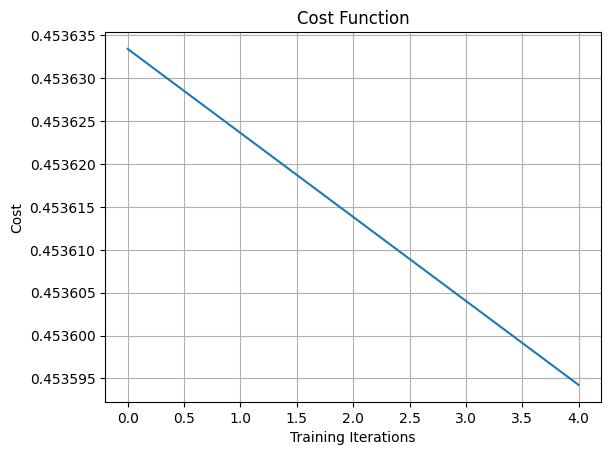

In [ ]:
plt.grid()
plt.plot(range(num_iterations),cost)

plt.title('Cost Function')
plt.xlabel('Training Iterations')
plt.ylabel('Cost')

As you can notice, the loss decreases over the training iterations.


Thus, we have learned how to build a neural network from scratch in the next chapter we will one of the popularly used deep learning libraries called TensorFlow.